In [20]:
!pip install ucimlrepo


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("abalone.csv")

# Drop the 'Sex' categorical column
df = df.drop('Sex', axis=1)

# Separate features and target
X = df.drop('Rings', axis=1)
y = df['Rings']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training R² Score:", r2_train)
print("Test R² Score:", r2_test)



Mean Squared Error (MSE): 5.1715794258373196
R² Score: 0.5222652120307241
Training R² Score: 0.9377130680692634
Test R² Score: 0.5222652120307241


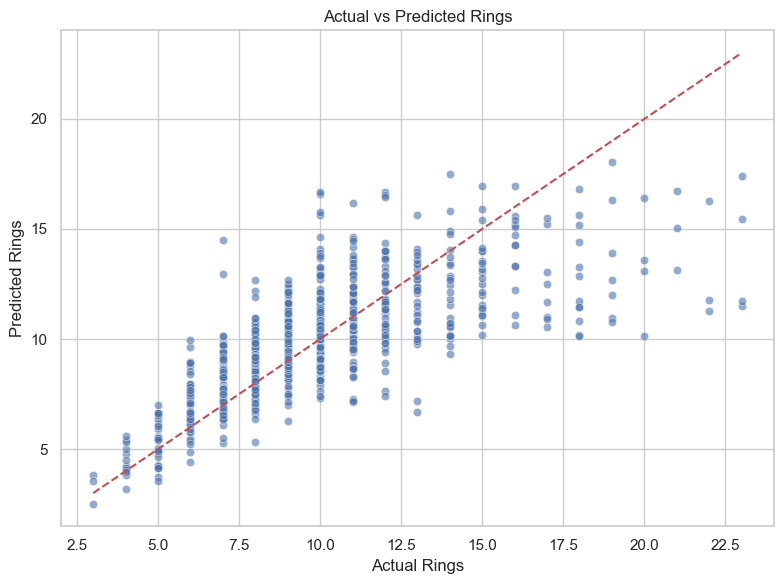

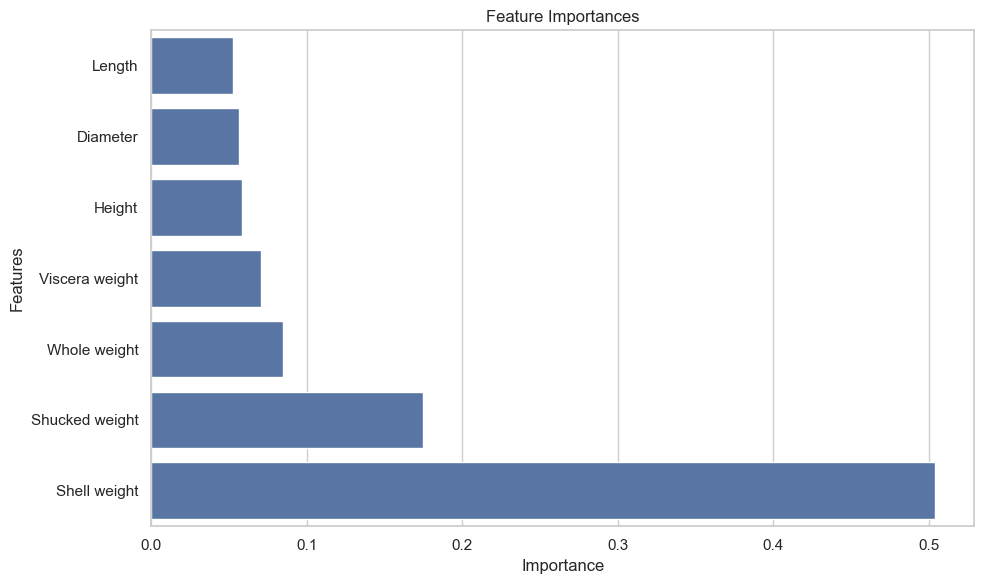

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')
plt.tight_layout()
plt.show()

# Plot 2: Feature Importances
importances = model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
